In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
plt.rcParams['figure.figsize'] = (15, 8)

## Loading initial datasets and filtering

In [106]:
results = pd.read_csv('data/ecotox/results.txt',sep='\|', engine='python')
results.head()

result_id  test_id sample_size_mean_op sample_size_mean  \
0      61358  1108761                 NaN               NC   
1     136246  1165989                 NaN               NC   
2     223703  1097736                 NaN               NC   
3     151106  1187635                 NaN               NC   
4      53559  1012894                 NaN               NC   

   sample_size_min_op sample_size_min  sample_size_max_op sample_size_max  \
0                 NaN              NC                 NaN              NC   
1                 NaN              NC                 NaN              NC   
2                 NaN              NC                 NaN              NC   
3                 NaN              NC                 NaN              NC   
4                 NaN              NC                 NaN              NC   

  sample_size_unit sample_size_comments  ... dry_wet_pct_min  \
0               NC                  NaN  ...              NC   
1               NC                  NaN  ...              NC   
2               NC                  NaN  ...              NC   
3               NC                  NaN  ...              NC   
4               NC                  NaN  ...              NC   

  dry_wet_pct_max_op dry_wet_pct_max dry_wet_pct_comments steady_state  \
0                NaN              NC                  NaN           NC   
1                NaN              NC                  NaN           NC   
2                NaN              NC                  NaN           NC   
3                NaN              NC                  NaN           NC   
4                NaN              NC                  NaN           NC   

  additional_comments companion_tag created_date modified_date  \
0                               NaN   01/31/1985    02/21/1995   
1                               NaN   04/19/1996           NaN   
2                               NaN   10/02/2003           NaN   
3                               NaN   10/10/1997           NaN   
4                               NaN   11/21/1995           NaN   

  old_terretox_result_number  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 137 columns]

In [107]:
test = pd.read_csv('data/ecotox/tests.txt',sep='\|', engine='python')
test.head()

test_id  reference_number  test_cas test_grade test_grade_comments  \
0        1             35000   1336363          R                 NaN   
1        2             35000   1336363          R                 NaN   
2        3             35001   2385855         NR                 NaN   
3        4             35002   7631994         NR                 NaN   
4        5             35002   7631994         NR                 NaN   

  test_formulation test_formulation_comments test_radiolabel  \
0               NR                       NaN              NR   
1               NR                       NaN              NR   
2               NR                       NaN              NR   
3               NR                       NaN              NR   
4               NR                       NaN              NR   

  test_radiolabel_comments test_purity_mean_op  ... halflife_min_op  \
0                      NaN                 NaN  ...             NaN   
1                      NaN                 NaN  ...             NaN   
2                      NaN                 NaN  ...             NaN   
3                      NaN                 NaN  ...             NaN   
4                      NaN                 NaN  ...             NaN   

  halflife_min halflife_max_op halflife_max halflife_unit halflife_comments  \
0           NC             NaN           NC            NC               NaN   
1           NC             NaN           NC            NC               NaN   
2           NC             NaN           NC            NC               NaN   
3           NC             NaN           NC            NC               NaN   
4           NC             NaN           NC            NC               NaN   

  additional_comments  created_date modified_date published_date  
0                        01/28/1998    07/20/2012     09/14/2012  
1                        01/28/1998    07/20/2012     09/14/2012  
2                        01/28/1998    07/20/2012     09/14/2012  
3                        01/28/1998    07/20/2012     09/14/2012  
4                        01/28/1998    07/20/2012     09/14/2012  

[5 rows x 122 columns]

In [108]:
species = pd.read_csv('data/ecotox/validation/species.txt',sep='\|', engine='python')
species.head()

species_number     common_name             latin_name   kingdom  \
0               1  Fathead Minnow    Pimephales promelas  Animalia   
1               2        Bluegill    Lepomis macrochirus  Animalia   
2               3     Brook Trout  Salvelinus fontinalis  Animalia   
3               4   Rainbow Trout    Oncorhynchus mykiss  Animalia   
4               5      Water Flea          Daphnia magna  Animalia   

  phylum_division subphylum_div    superclass           class      tax_order  \
0        Chordata    Vertebrata  Osteichthyes  Actinopterygii  Cypriniformes   
1        Chordata    Vertebrata  Osteichthyes  Actinopterygii    Perciformes   
2        Chordata    Vertebrata  Osteichthyes  Actinopterygii  Salmoniformes   
3        Chordata    Vertebrata  Osteichthyes  Actinopterygii  Salmoniformes   
4      Arthropoda     Crustacea           NaN    Branchiopoda    Diplostraca   

          family         genus      species subspecies variety  \
0     Cyprinidae    Pimephales     promelas        NaN     NaN   
1  Centrarchidae       Lepomis  macrochirus        NaN     NaN   
2     Salmonidae    Salvelinus   fontinalis        NaN     NaN   
3     Salmonidae  Oncorhynchus       mykiss        NaN     NaN   
4     Daphniidae       Daphnia        magna        NaN     NaN   

                                        ecotox_group  
0                         Fish,Standard Test Species  
1                         Fish,Standard Test Species  
2                         Fish,Standard Test Species  
3  Fish,Standard Test Species,U.S. Exotic/Nuisanc...  
4                  Crustaceans,Standard Test Species

In [119]:
results.to_pickle("data/results.pkl")
test.to_pickle("data/test.pkl")
species.to_pickle("data/species.pkl")

In [ ]:
results = pd.read_pickle("data/results.pkl")
test = pd.read_pickle("data/test.pkl")
species = pd.read_pickle("data/species.pkl")

**Prefilter**
Considering only:
- Endpoint LC50 or EC50 (Mortality at 50%)
- No embrions (Code EM)
- Group Fish

Considering all the endpoints containing LC50 or EC50: there are **different codes identify the same endpoints**

In [109]:
results[results.endpoint.str.contains("LC50")].endpoint.unique()

array(['LC50', 'LC50*', 'LC50/', 'LC50*/'], dtype=object)

In [110]:
results[results.endpoint.str.contains("EC50")].endpoint.unique()

array(['EC50', 'EC50/', 'EC50*', 'EC50*/'], dtype=object)

In [111]:
# Retaining only LC50 or EC50
res_50 = results[(results.endpoint.str.contains("LC50")) | (results.endpoint.str.contains("EC50"))]

Considering the possible effects connected to LC50. We need to filter on **Mortality Group**

In [112]:
res_50.effect.unique()

array(['ITX', 'MOR', 'BEH', 'GRO', 'REP', 'MLT', 'PHY', 'POP', 'BCM',
       'DVP', '~MOR', 'HIS', 'BEH/', 'REP/', 'GEN', '~ITX', 'ENZ', '~DVP',
       'MOR/', 'FDB', 'MPH', 'AVO', '~DVP/', 'INJ', 'HRM', 'CEL', '~REP/',
       'ITX/', 'PRS', 'GRO/', 'POP/', 'PHY/', '~FDB', '~MOR/', '~PHY',
       '~GRO', '~REP', 'IMM', '~BCM', 'NER', 'ENZ/', 'BCM/', 'ACC',
       'FDB/', '~GEN', '~POP', '~MLT', 'DVP/', '~ITX/', '~ACC', '~BEH'],
      dtype=object)

*Note*: ~MOR is **retarted mortality**. MOR/ should be the same as MOR (?)

In [113]:
# Only the ones inside mortality group
res_50_mor = res_50[res_50.effect.str.contains("MOR")]

Look at the possible measurement inside the Mortality Group. **We take them all for now: we may filter only for mortality measurement?**

In [114]:
res_50_mor.measurement.unique()

array(['MORT', 'MORT/', 'SURV', 'TKNO', 'HTCH', 'SURV/', 'SVVS', 'LBCN',
       'HTCH/', 'LFSP', 'GMOR/', 'GMOR', 'LIFE', 'EBCN', 'MDTH', 'LIFE/'],
      dtype=object)

Retaining only **Fish not embrion**

In [115]:
# No embrions in the test
test_no_EM = test[test.organism_lifestage != "EM"]

In [116]:
# No Fish
species = species[~species.ecotox_group.isnull()]
species_fish = species[species.ecotox_group.str.contains("Fish")]

# Merge
test_fish_only = test.merge(species_fish, on="species_number")

Combining **all together**

In [117]:
results_final = res_50_mor.merge(test_fish_only, on = "test_id")

In [118]:
results_final.index.size

64746

In [121]:
results_final.to_pickle("data/results_final.pkl")

## Looking for null values, outliers and strange units in the new datasets

### CAS : Foreign key to CHEMICALS

In [100]:
# It's an index -> shouldn't be null values
sum(results_final['test_cas'].isnull())

0

No sense talking about outliers (possible with ECOTOX_GROUP when we will talk about the CAS characteristics)

**Defining a function to count the NaN and the possible outputs for one of the interested big features**

In [101]:
def null_output_counts(feature, dataframe):
    
    # Find columns that start with the interesting feature
    cols = list(dataframe.columns)
    features_interested = [i for i in cols if i.startswith(feature)]
    df_nan  = pd.DataFrame (index = features_interested, columns = ['null_values_inc_NC_NR%', '#outputs'])
    
    #Count total NaN + NR + NC
    for i in features_interested:
        df_nan['null_values_inc_NC_NR%'][i] = (sum(dataframe[i].isnull()) + len(dataframe[dataframe[i] == "NR"]) + len(dataframe[dataframe[i] =="NC"]))/len(dataframe)*100
        df_nan['#outputs'][i] = len(dataframe[i].unique())
    return df_nan, features_interested

### ORGANISMS

In [102]:
# Apply defined function to organism
df_org_nan, org_list = null_output_counts("organism", results_final)
df_org_nan

null_values_inc_NC_NR% #outputs
organism_final_wt_mean_op                      100        1
organism_final_wt_mean                     99.9707        6
organism_final_wt_min_op                       100        1
organism_final_wt_min                      99.9722        8
organism_final_wt_max_op                       100        1
organism_final_wt_max                      99.9722        8
organism_final_wt_unit                      99.966        4
organism_final_wt_comments                     100        1
organism_habitat                                 0        1
organism_source                            89.7986        9
organism_source_comments                   96.9867      282
organism_lifestage                         63.5653       46
organism_lifestage_comments                99.9568        9
organism_age_mean_op                        97.725        6
organism_age_mean                          86.6725      130
organism_age_min_op                        99.6664        3
organism_age_min                           93.4513       81
organism_age_max_op                         99.722        3
organism_age_max                           93.4513       94
organism_age_unit                          80.1038       28
organism_init_wt_mean_op                   99.9367        5
organism_init_wt_mean                      93.0868      561
organism_init_wt_min_op                    99.9876        3
organism_init_wt_min                       99.0687       85
organism_init_wt_max_op                    99.9861        4
organism_init_wt_max                       99.0687       93
organism_init_wt_unit                      92.4629        4
organism_characteristics                   31.8151     6521
organism_gender                            99.3451        5

**Usable features**: *organism_lifestage*, *organism_age_mean* (?)

Good to see at the correlation, need usable **numeric** features.  
Considering the organism_lifestage and age_mean (with age unit feature needed)

In [103]:
#consider only interesting features
org_intrs = ["organism_lifestage", "organism_age_mean", "organism_age_unit"]
df_org = results_final[org_intrs]

In [104]:
df_org.organism_lifestage.value_counts(dropna=False).head(20)

NR    38329
JV     6412
FI     3944
LV     2899
NC     2827
FY     2584
AD     2003
EG     1093
EM      959
SU      542
SF      501
YY      476
YO      321
AL      265
MX      257
YE      196
EY      154
LR       99
PA       96
UY       92
Name: organism_lifestage, dtype: int64

A lot of NR and NC, but once dropped/imputed (I don't see how imputing a categorical like this one) seems a useful feature

In [194]:
organism_unit_counts = df_org.organism_age_unit.value_counts(dropna=False)
organism_unit_counts

NR      97911
h       13099
d       12504
ins      9382
NC       4250
mo       3498
wk       3375
stg      1214
dph      1175
yr        374
go        326
yc        272
hph       252
ls        234
dpu       193
hpe       178
ge        170
hpf       153
dpe       147
fd        117
dpf       101
gs         88
nf         72
LSI        65
mpf        52
wpe        46
ac         40
mpp        24
cs         21
wph        18
dps        16
tls        15
hbf         9
sst         7
dpw         7
mph         6
NaN         5
hpr         5
dpp         5
gts         5
brd         4
su          3
mi          2
dpmm        2
dpo         2
moph        1
mopm        1
dpys        1
dpr         1
Name: organism_age_unit, dtype: int64

Also now, lot of strage unit variables.  
Considering NR and NC to see if there's a match with missing means:

In [200]:
df_org[df_org.organism_age_unit == "NC"].organism_age_mean.value_counts(dropna=False)

NC    4250
Name: organism_age_mean, dtype: int64

In [201]:
df_org[df_org.organism_age_unit == "NR"].organism_age_mean.value_counts(dropna=False)

NR    97910
3         1
Name: organism_age_mean, dtype: int64

NC totally match, NR not (But without unit...3 what?)

Some strange unit values used here:
- ins: instar
- stg: stage 
- dph: days post hatch
- go: gosner stage
- yc: year class
- hph: hours post hatch

Full list in **data/DataCodes.pdf (Appendix I)**

Looking to the top cases:

In [204]:
df_org[df_org.organism_age_unit == "ins"].organism_age_mean.value_counts(dropna=False)

4          4120
3          1690
1          1249
NR         1210
2           953
5            80
6            33
NaN           9
12            8
Z3            7
4TH           6
3RD           3
13            2
7             2
LAST          2
Z1            2
8             1
3RD-4TH       1
10            1
11            1
9             1
LATE          1
Name: organism_age_mean, dtype: int64

In [205]:
df_org[df_org.organism_age_unit == "stg"].organism_age_mean.value_counts(dropna=False)

4         331
1         229
2         150
NR        129
3          99
25         51
8          32
6          24
5          23
7          12
10         12
26         11
46         11
C          10
9           7
C OR D      6
6A          6
21          6
CI-CIV      4
11          4
53          4
Z1          4
49          4
47          4
45          4
48.5        4
15          4
20          3
12          3
C1-C3       2
39          2
28          2
13          2
42          2
14          2
D3-D4       1
16          1
C4          1
30          1
35          1
D1-D2       1
L4          1
A-B         1
24          1
D0          1
54          1
Name: organism_age_mean, dtype: int64

In [206]:
df_org[df_org.organism_age_unit == "dph"].organism_age_mean.value_counts(dropna=False)

NR     465
14     254
4       50
1       38
7       38
      ... 
167      1
46       1
43       1
41       1
74       1
Name: organism_age_mean, Length: 63, dtype: int64

In [207]:
df_org[df_org.organism_age_unit == "go"].organism_age_mean.value_counts(dropna=False)

25    174
NR    110
26     20
36      8
19      5
46      4
11      2
21      1
29      1
33      1
Name: organism_age_mean, dtype: int64

In [208]:
df_org[df_org.organism_age_unit == "yc"].organism_age_mean.value_counts(dropna=False)

2    152
1    120
Name: organism_age_mean, dtype: int64

In [210]:
df_org[df_org.organism_age_unit == "hph"].organism_age_mean.value_counts(dropna=False)

24    181
8      17
12     16
NR     10
1       9
72      6
4       4
7       4
48      2
2       2
3       1
Name: organism_age_mean, dtype: int64

In [211]:
df_org[df_org.organism_age_unit == "ls"].organism_age_mean.value_counts(dropna=False)

NR    138
2      38
4      30
1      16
3      11
6       1
Name: organism_age_mean, dtype: int64

**Here we don't have a lot of NaN**:
in my opinion if we want to use this feature we need to:
1. Put all in the same unit of measure or
2. Categorize the most important units

### EXPOSURES\OBSERVATION\STUDY DURATION

Considering all the columns considering a "duration" inside

In [127]:
results_final.columns[results_final.columns.str.contains("duration")]

Index(['obs_duration_mean_op', 'obs_duration_mean', 'obs_duration_min_op',
       'obs_duration_min', 'obs_duration_max_op', 'obs_duration_max',
       'obs_duration_unit', 'obs_duration_comments', 'study_duration_mean_op',
       'study_duration_mean', 'study_duration_min_op', 'study_duration_min',
       'study_duration_max_op', 'study_duration_max', 'study_duration_unit',
       'study_duration_comments', 'exposure_duration_mean_op',
       'exposure_duration_mean', 'exposure_duration_min_op',
       'exposure_duration_min', 'exposure_duration_max_op',
       'exposure_duration_max', 'exposure_duration_unit',
       'exposure_duration_comments'],
      dtype='object')

We have **exposure, observation or study duration**.
#### Starting by exposure

In [136]:
# Computing dataframe for exposure
df_exp_nan, exp_list = null_output_counts("exposure", results_final)
df_exp_nan

null_values_inc_NC_NR% #outputs
exposure_duration_mean_op                 99.8224        5
exposure_duration_mean                    85.3705       74
exposure_duration_min_op                  99.9645        3
exposure_duration_min                     99.9537        6
exposure_duration_max_op                  99.9645        3
exposure_duration_max                     99.9537        6
exposure_duration_unit                    85.3242       10
exposure_duration_comments                99.9521        3
exposure_type                              8.2229       21
exposure_type_comments                    99.7359        2

**85%** of the exposure_duration_mean (most interesting feature here are **missing**). **exposure_type** could contain useful info.  
Moving on considering duration_unit, mean and exposure_type

In [123]:
exp_intrs = ["exposure_duration_unit", "exposure_duration_mean", "exposure_type"]
df_exp = results_final[exp_intrs]

Counting the number of each value:

In [124]:
exposure_duration_unit_counts = df_exp.exposure_duration_unit.value_counts(dropna=False)
exposure_duration_unit_counts

NC     55243
h       8882
d        520
mi        43
hpf       42
dph        8
dpf        5
ht         1
wk         1
NaN        1
Name: exposure_duration_unit, dtype: int64

In [160]:
# Removing NaN for plot
exposure_duration_unit_counts = df_exp.exposure_duration_unit.value_counts()

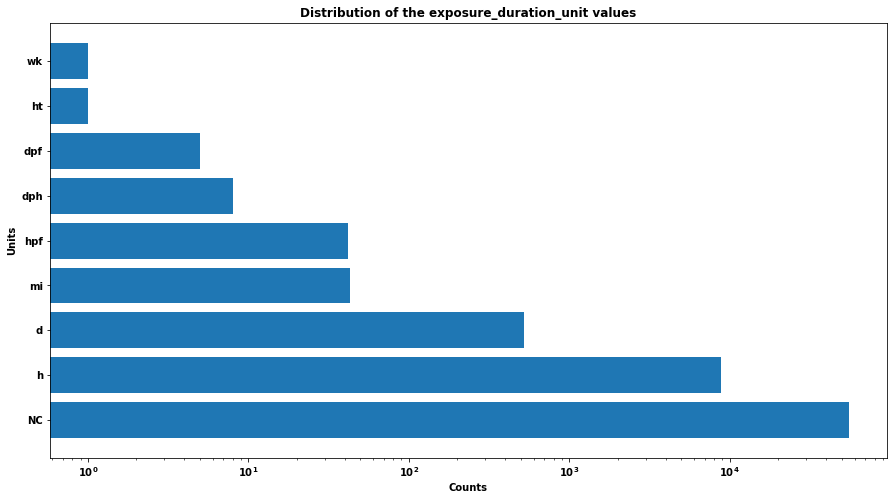

In [167]:
plt.barh(exposure_duration_unit_counts.index, exposure_duration_unit_counts.values, log=True)
plt.title("Distribution of the exposure_duration_unit values")
plt.xlabel("Counts")
plt.ylabel("Units");

**_Note_: log scale used**

**55243 NC + 14 NaN**.  
Reflecting in exposure_duration_mean:

In [128]:
df_exp[df_exp.exposure_duration_unit == "NC"].exposure_duration_mean.value_counts(dropna=False)

NC    55243
Name: exposure_duration_mean, dtype: int64

Same number: **all NC** from one side have the same NC in duration_mean

Duration unit meanings:
- h/d/wk/mi/s/mo/yr = hour/day/weeks/minute/seconds/month/years
- ht: until hatch
- dph: days post hatch
- hpf: hours post fertilization

Full list in **data/DataCodes.pdf (Appendix I)**

Considering the top cases for strange units:

In [130]:
df_exp[df_exp.exposure_duration_unit == "hpf"].exposure_duration_mean.value_counts(dropna=False)

96     31
144     7
120     3
NR      1
Name: exposure_duration_mean, dtype: int64

In [131]:
df_exp[df_exp.exposure_duration_unit == "dph"].exposure_duration_mean.value_counts(dropna=False)

28    8
Name: exposure_duration_mean, dtype: int64

In [132]:
df_exp[df_exp.exposure_duration_unit == "ht"].exposure_duration_mean.value_counts(dropna=False)

NaN    1
Name: exposure_duration_mean, dtype: int64

The strange values could be converted easily. Hovewer, the problem is the **high value of missing numbers**  
Analyzing exposure_type:

In [139]:
df_exp.exposure_type.unique()

array(['S', 'F', 'NR', 'R', 'AQUA - NR', 'YK', 'P', 'S/', 'E', 'IP', 'R/',
       'SP', 'NR/', 'OR', 'F/', 'P/', 'O', 'IV', 'FD', 'SC', 'IJ'],
      dtype=object)

Seems good as categorical. Counting:

In [140]:
exposure_type_counts = df_exp.exposure_type.value_counts(dropna=False)
exposure_type_counts

S            38337
F            13376
R             6790
NR            5324
AQUA - NR      517
P              131
S/              70
R/              69
E               48
O               19
NR/             14
IP              13
F/              12
YK               7
P/               6
OR               4
FD               3
IV               3
SP               1
IJ               1
SC               1
Name: exposure_type, dtype: int64

About 5000 missing values: can be used after **imputing them**  
*Idea*: using AQUA for all of them (?)

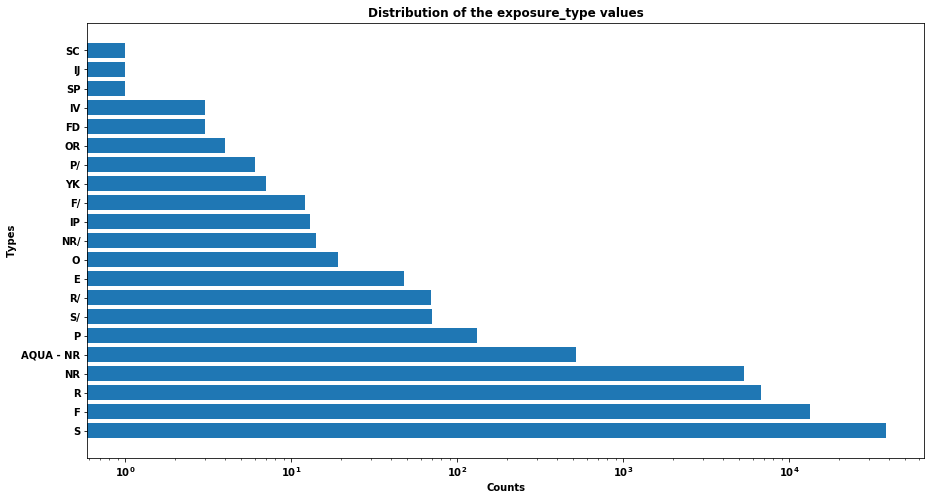

In [168]:
plt.barh(exposure_type_counts.index, exposure_type_counts.values, log=True)
plt.title("Distribution of the exposure_type values")
plt.xlabel("Counts")
plt.ylabel("Types");

**_Note_: log scale used**

#### Observation duration

In [135]:
df_obs_nan, exp_list = null_output_counts("obs", results_final)
df_obs_nan

null_values_inc_NC_NR% #outputs
obs_duration_mean_op                 99.4424        5
obs_duration_mean                    1.85649      325
obs_duration_min_op                  98.6517        3
obs_duration_min                     98.4879       80
obs_duration_max_op                  98.6547        3
obs_duration_max                     98.4879       88
obs_duration_unit                   0.294999       14
obs_duration_comments                 97.257        7

Very good results for **duration_mean** and **duration_unit**. Anaylzing them

In [153]:
obs_intrs = ["obs_duration_unit", "obs_duration_mean"]
df_obs = results_final[obs_intrs]

Analyzing duration units:

In [171]:
obs_duration_unit_counts = df_obs.obs_duration_unit.value_counts(dropna=False)
obs_duration_unit_counts

h      60617
d       3457
NR       191
mi       162
wk       119
hpf       66
dph       52
mo        36
ht        31
dpf       10
fry        2
ma         1
dpu        1
hv         1
Name: obs_duration_unit, dtype: int64

**191 NR**.
- dpf: days post fertilization
(The one with just 1 can be dropped)

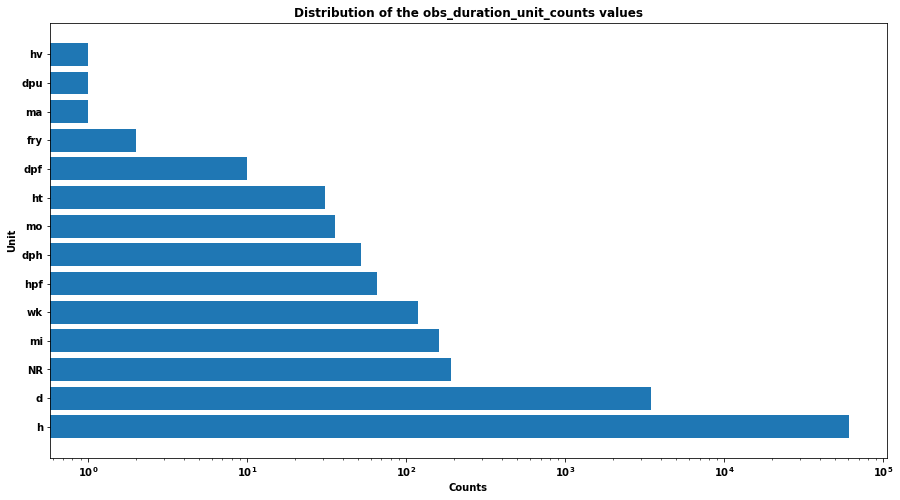

In [172]:
plt.barh(obs_duration_unit_counts.index, obs_duration_unit_counts.values, log=True)
plt.title("Distribution of the obs_duration_unit_counts values")
plt.xlabel("Counts")
plt.ylabel("Unit");

**log scale**  
Looking into NR values

In [173]:
df_obs[df_obs.obs_duration_unit == "NR"].obs_duration_mean.value_counts(dropna=False)

NR    191
Name: obs_duration_mean, dtype: int64

They are **both NR**. We could **drop** them without problem and proceed  
Analyzing the durations mean to look at the missing values

In [183]:
obs_duration_means_count = df_obs.obs_duration_mean.value_counts(dropna=False)
indexs_nulls = ((obs_duration_means_count.index == "NR") | (obs_duration_means_count.index == "NC") | (obs_duration_means_count.index == "NaN"))
obs_duration_means_count[indexs_nulls]

NR    1201
Name: obs_duration_mean, dtype: int64

Only **NR**, for a total of 1201 values. Considering in which categories of unit these fall:

In [186]:
null_obs_on_unit = df_obs[df_obs.obs_duration_mean == "NR"].obs_duration_unit.value_counts(dropna=False)
null_obs_on_unit

h      864
NR     191
d       89
ht      29
mi      23
wk       3
fry      2
Name: obs_duration_unit, dtype: int64

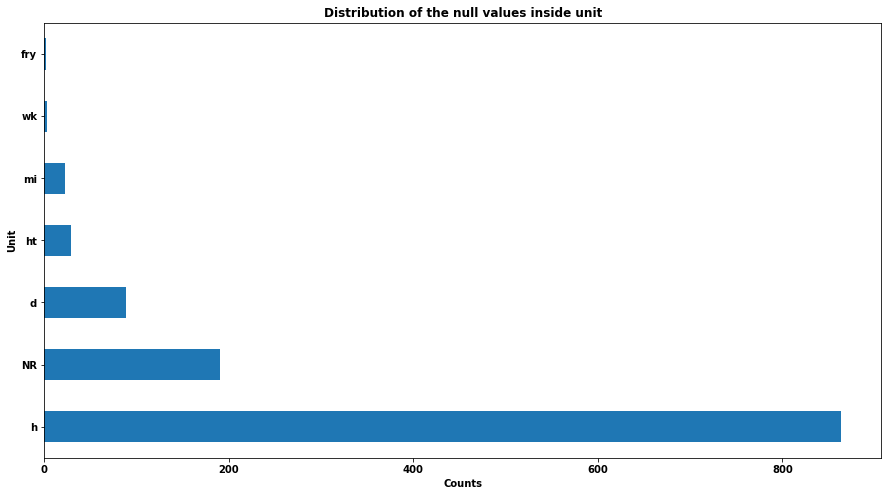

In [191]:
#plot of the distribution of null values across different units:
null_obs_on_unit.plot(kind="barh")
plt.title("Distribution of the null values inside unit")
plt.xlabel("Counts")
plt.ylabel("Unit");

The value with most nulls is hour (but it has a total of 60000 possible values inside). We could drop or impute them.  
**Simple imputing method: assign them the median/mean of the other values inside the same unit**
Next, plot of the distribution of units inside the hours/days groups

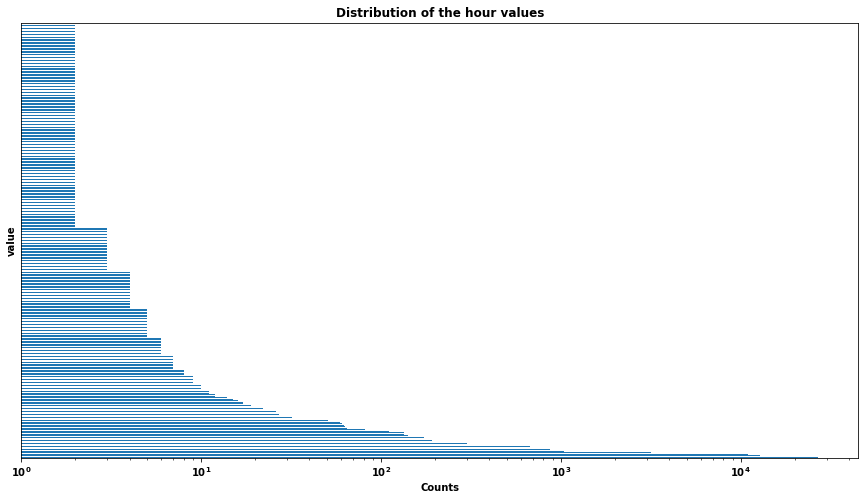

In [242]:
obs_means_h_count = df_obs[df_obs.obs_duration_unit=="h"].obs_duration_mean.value_counts(dropna=False)
obs_means_h_count.plot(kind="barh", log=True)
plt.yticks([]);
plt.title("Distribution of the hour values")
plt.xlabel("Counts")
plt.ylabel("value");

In [237]:
obs_means_h_count.index.size

285

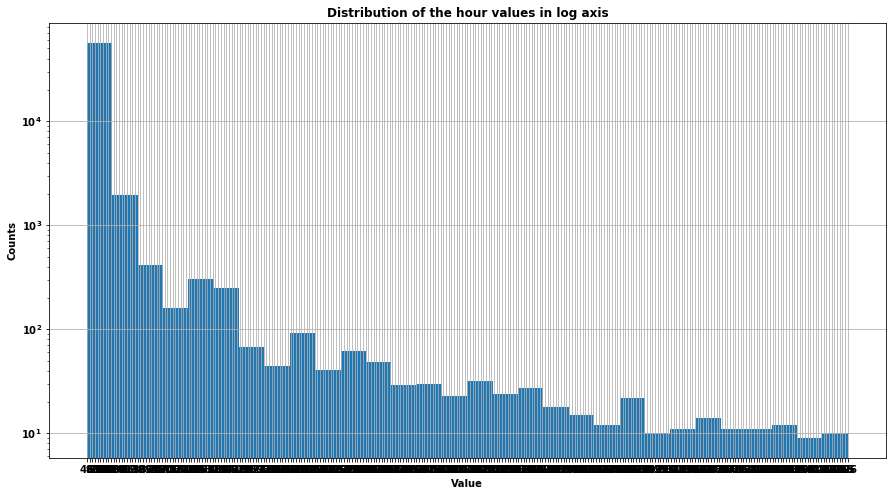

In [271]:
#histogram for better visualize
df_obs[df_obs.obs_duration_unit=="h"].obs_duration_mean.hist(bins=30)
plt.yscale("log")
plt.title("Distribution of the hour values in log axis")
plt.xlabel("Value")
plt.ylabel("Counts");

Power law, many experiments dure the same, other very rare
Impossible to visualize all the counts, printing the top

In [204]:
obs_means_h_count.head(15)

96     26981
24     12728
48     10909
72      3178
6       1046
NR       864
3        789
12       670
1        522
120      301
2        191
168      191
144      182
36       173
9        141
Name: obs_duration_mean, dtype: int64

Lot of variety seen, but the feature can be used for sure one imputed missing values

In [246]:
obs_means_d_count.index.size

94

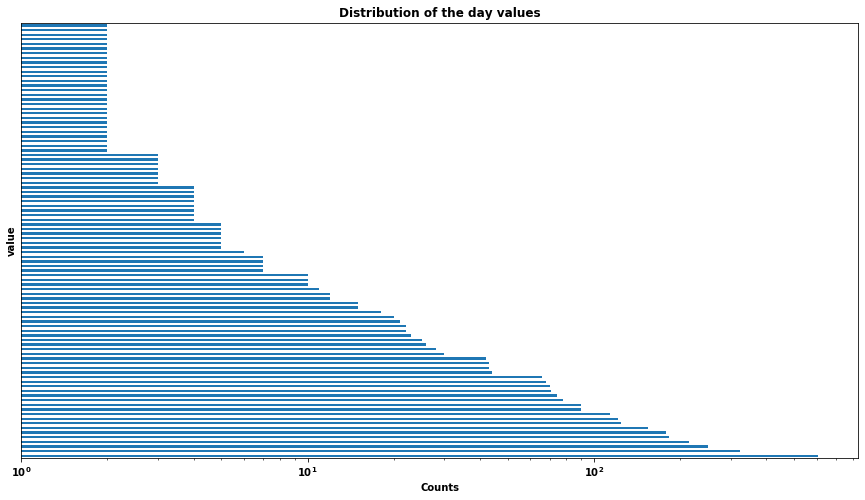

In [245]:
obs_means_d_count = df_obs[df_obs.obs_duration_unit=="d"].obs_duration_mean.value_counts(dropna=False)
obs_means_d_count.plot(kind="barh", log=True)
plt.yticks([]);
plt.title("Distribution of the day values")
plt.xlabel("Counts")
plt.ylabel("value");

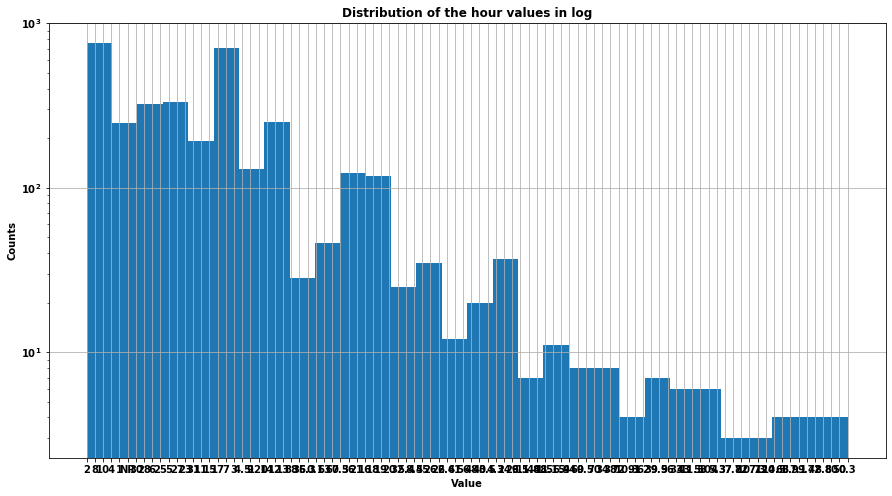

In [269]:
#obs_means_d_count.hist(bins=50)
df_obs[df_obs.obs_duration_unit=="d"].obs_duration_mean.hist(bins = 30)
plt.yscale("log")
plt.title("Distribution of the hour values in log")
plt.xlabel("Value")
plt.ylabel("Counts");
#plt.xticks([]);

The duration of the experiments assume the form of a power law. Most of the experiments have the same duration, with other very rare

In [206]:
obs_means_d_count.head(15)

7     606
4     323
5     250
8     213
10    181
28    177
14    153
11    123
6     120
9     113
NR     89
30     89
12     77
20     73
21     70
Name: obs_duration_mean, dtype: int64

Same as before.
#### Using this feature, after all the necessary imputation can be productive

### Study duration case

In [207]:
# Computing dataframe for study duration
df_study_dur_nan, study_dur_list = null_output_counts("study", results_final)
df_study_dur_nan

null_values_inc_NC_NR% #outputs
study_duration_mean_op                 99.8177        5
study_duration_mean                    91.2087       68
study_duration_min_op                  99.9645        3
study_duration_min                     99.9598        5
study_duration_max_op                  99.9645        3
study_duration_max                     99.9598        5
study_duration_unit                     91.167        9
study_duration_comments                99.9521        3
study_type                             99.9444        9
study_type_comments                        100        1

**No need of further analysis. Too much NaNs to decide to proceed**

### CONCENTRATIONS

In [216]:
# Computing dataframe for concentrations
df_conc_nan, conc_list = null_output_counts("conc", results)
df_conc_nan

null_values_inc_NC_NR% #outputs
conc1_type                    3.81489        8
conc1_mean_op                 89.7413        6
conc1_mean                    4.37073    22896
conc1_min_op                  96.6921        5
conc1_min                     49.3594    15014
conc1_max_op                  96.6824        5
conc1_max                     49.3588    17726
conc1_unit                  0.0307798      239
conc1_comments                93.6974      598
conc2_type                    98.8509        6
conc2_mean_op                  99.965        5
conc2_mean                    98.9625     1178
conc2_min_op                  99.9614        2
conc2_min                     99.2987      855
conc2_max_op                  99.9614        2
conc2_max                     99.2987      892
conc2_unit                    98.9131       16
conc2_comments                99.9264       12
conc3_type                    99.9837        2
conc3_mean_op                     100        1
conc3_mean                    99.9837       28
conc3_min_op                      100        1
conc3_min                     99.9837       27
conc3_max_op                      100        1
conc3_max                     99.9837       28
conc3_unit                    99.9837        3
conc3_comments                99.9988        2

Only **conc1 seems useful**:

In [217]:
# Computing dataframe for concentration 1
df_conc_nan, conc_list = null_output_counts("conc1", results)
df_conc_nan

null_values_inc_NC_NR% #outputs
conc1_type                    3.81489        8
conc1_mean_op                 89.7413        6
conc1_mean                    4.37073    22896
conc1_min_op                  96.6921        5
conc1_min                     49.3594    15014
conc1_max_op                  96.6824        5
conc1_max                     49.3588    17726
conc1_unit                  0.0307798      239
conc1_comments                93.6974      598

As usual, considering the **mean and unit**. Useful to look also to type:

In [218]:
conc_intrs = ['conc1_type', 'conc1_mean', 'conc1_unit']
df_conc = results[conc_intrs]

In [220]:
df_conc.conc1_type.value_counts()

A     70512
F     43190
T     41105
NC     6307
D      3294
U       972
L       299
NR       14
Name: conc1_type, dtype: int64

**Small number of NaN, few categories: could be useful as categorical**
Definitions:
- A: Active ingredients
- F: Formulation
- D: Dissolved
- L: Labile
- T: Total
- U: Unionized

Considering now units:

In [224]:
conc_unit_counts = df_conc.conc1_unit.value_counts(dropna=False)
conc_unit_counts

ug/L             78499
mg/L             30896
ppm              14452
AI ug/L           6174
AI mg/L           5170
                 ...  
mg/L/h               1
mg/L 10 mi           1
ng/g egg             1
nmol/kg              1
AI ug/100 cm2        1
Name: conc1_unit, Length: 239, dtype: int64

**239 different concentrations**: how to deal with all these different units?  
**_AI_** is active ingredients -> What's the difference with the normal case?

In [227]:
conc_unit_counts.head(30)

ug/L              78499
mg/L              30896
ppm               14452
AI ug/L            6174
AI mg/L            5170
ppb                4052
uM                 2356
ug/ml              1716
mg/kg              1461
ul/L               1355
mM                 1069
umol/L             1056
AI ppm food        1055
AI ppm              916
mg/kg soil          827
mg/kg dry soil      824
%                   695
nM                  628
AI ug/ml            573
ng/L                507
ug/cm2              490
ug/g soil           446
AI %                426
mmol/L              422
g/L                 388
mg/ml               386
ae mg/L             380
M                   378
nmol/L              363
ug/eu               358
Name: conc1_unit, dtype: int64

As we see, there are a lot of different unit and all makes sense. More details in **data/DataCodes.pdf (Appendix N & W)**

A closer look to the first case:

In [225]:
df_conc[df_conc.conc1_unit == "ug/L"].conc1_mean.value_counts(dropna=False)

NR         3885
1000        758
10000       683
100000      544
100         485
           ... 
5.40          1
7460000       1
552.8         1
305900        1
55190         1
Name: conc1_mean, Length: 12428, dtype: int64

**Concentration is a variable we need for sure**. We should fix it, proposed solutions are the same as for organisms:
- Considering a categorical definition
- All in the same units

### PUBLICATION YEAR

In [272]:
df_pub_year_nan, pub_year_list = null_output_counts("publ", results_final)
df_pub_year_nan

null_values_inc_NC_NR% #outputs
published_date                47.6292       65

Half of the dates are missing  
Look at the distribution of publication years

In [273]:
published_dates = results_final["published_date"]

In [287]:
date_counts = published_dates.value_counts(dropna=False)
date_counts

NaN           30838
06/15/2012     7533
06/14/2013     3958
06/20/2000     1128
03/05/2008     1110
              ...  
06/11/2001       73
12/14/2017       51
03/16/2011       39
03/09/2015       36
03/26/2001       22
Name: published_date, Length: 65, dtype: int64

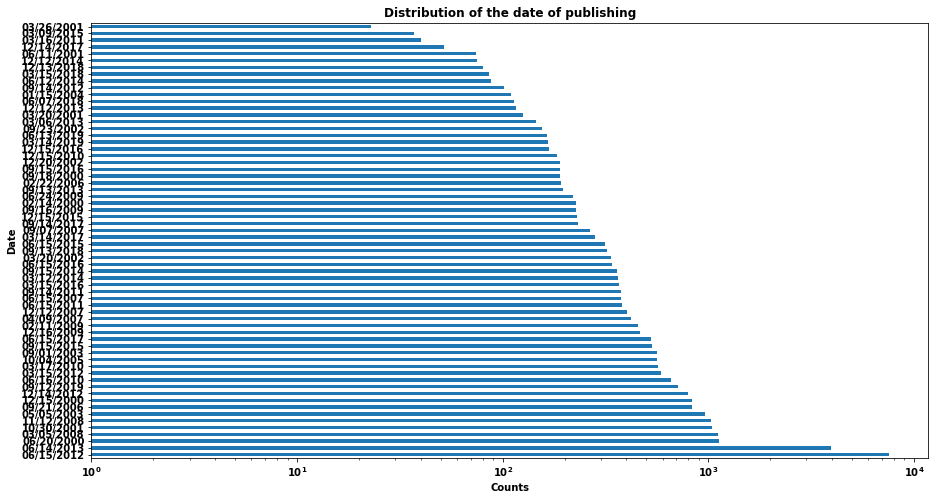

In [306]:
#drop na
date_counts = published_dates.value_counts()
date_counts.plot(kind="barh", log=True)
plt.title("Distribution of the date of publishing")
plt.xlabel("Counts")
plt.ylabel("Date");

We see that a lot of paper has been published on 15/06/2012. We can try to group by year and see when most of the paper has been published

In [299]:
date_counts.index = pd.to_datetime(date_counts.index)
date_grouped = date_counts.groupby(by=date_counts.index.year)
date_counts_years = date_grouped.agg(sum)
date_counts_years

2000    2375
2001    1256
2002     678
2003    1519
2004     109
2005     563
2006    1027
2007    1464
2008    2139
2009    1364
2010    1408
2011     795
2012    9016
2013    4413
2014     884
2015    1112
2016    1061
2017    1087
2018     599
2019    1039
Name: published_date, dtype: int64

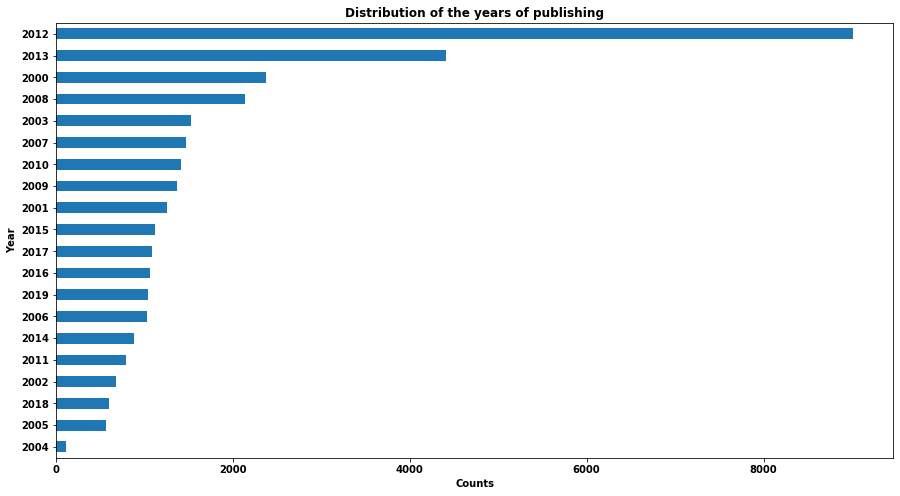

In [307]:
date_counts_years.sort_values().plot(kind="barh");
plt.title("Distribution of the years of publishing")
plt.xlabel("Counts")
plt.ylabel("Year");

**2012** is the most active year for our research, basically doubling the sequent year.